This is where I am planning the ananlysis of the Education Library data set. I'll make a mark-down comment block with each of my questions/hypotheses and then we will find the answers and graph the results. This analysis will focus on how often books have circulated. 

Let's set up our imports and open up the file and read out all the column titles for easy reference


In [5]:
##all my imports are up here
import pandas as pd 
import matplotlib.pyplot as plt
import string
from datetime import datetime

#open file
file_name="Education_Library.xlsx"
data=pd.read_excel(file_name)

#list columns for easy reference
print(data.columns.tolist())

['Catalog Format', 'Catalog Id', 'Catalog Flex Id', 'Catalog Created Date', 'Catalog Created Year', 'Catalog Author', 'Catalog Title', 'Item Call Number', 'Item Shelving Id', 'Item Barcode', 'Item Collection', 'Item Id', 'Item Category1', 'Item Type', 'Item Last Activity Year', 'Item Last Checkout Year', 'Item Library Desc', 'Item Library Code', 'Item Status', 'Item Stat Period Checkouts', 'Total Lifetime Circulation']


What is the average amount of time since a book has been checked out? Make a histogram of how many years it has been since each book was checked out. (<1 years, <2 years, etc). So subtract last active year from current year. check for any invalid (negative) values and print out an eorror message with the book info is that is the case. Otherwise put the differences in a histogram. 

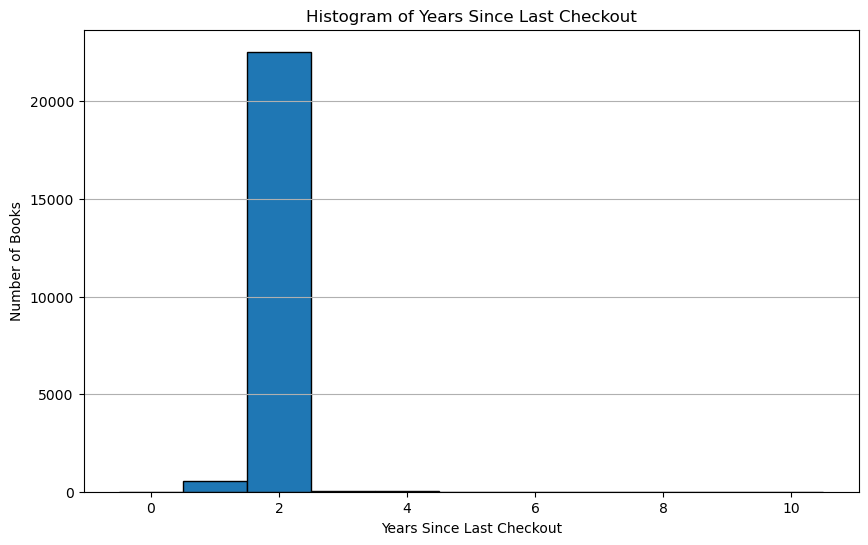

In [11]:
#Make sure values are numeric (see lower down for NaN values)
data['Item Last Checkout Year'] = pd.to_numeric(data['Item Last Checkout Year'], errors='coerce')
current_year= datetime.now().year

# Calculate years since last checkout
data['Years Since Last Checkout'] = current_year - data['Item Last Checkout Year']

# Check for invalid (negative) values
invalid_entries = data[data['Years Since Last Checkout'] < 0] ##return true/false

if not invalid_entries.empty:
        # Print error message with book info for invalid entries
        print("Invalid entries found where the last checkout year is in the future:")
        print(invalid_entries[['Catalog Title', 'Item Last Checkout Year']])
else:
        # Plot the histogram for valid entries
        valid_data = data[data['Years Since Last Checkout'] >= 0]

        plt.figure(figsize=(10, 6))
        plt.hist(valid_data['Years Since Last Checkout'], bins=range(0, 12), edgecolor='black', align='left')
        plt.title('Histogram of Years Since Last Checkout')
        plt.xlabel('Years Since Last Checkout')
        plt.ylabel('Number of Books')
        plt.grid(axis='y')
        plt.show()

##This is a really interesting result! a huge proportion of books have been checked out in the last two years. 
##Definitely one of the more active library collections

In [ ]:
What percentage of books have never been checked out?

In [12]:
##We will take any empty or NaN value to mean the book has not been checked out
##identify entries with NaN or missing 'Item Last Checkout Year'
never_checked_out = data[data['Item Last Checkout Year'].isna()]

# Count the number of books never checked out
never_checked_out_count = never_checked_out.shape[0]

# Print the results
print(f"Number of books that have never been checked out: {never_checked_out_count}")
if never_checked_out_count > 0:
    print("Details of books never checked out:")
    print(never_checked_out[['Catalog Title', 'Catalog Author', 'Item Barcode']])

##Great, as I sort of expected, all of the books in the data set have been checked out at some point in 2000-2024

Number of books that have never been checked out: 0


What percentage of the collection has ciruclated in the last 1, 5, 10, and 20 years? let's make a little bar graph of what percentage of the books have been checked out in that time frame. 

In [ ]:
#code here

How many books have been checked out 0, 1, 2, 3, 4, 5, or 5+ times? make a pie chart sorting the books into these categories.

In [ ]:
#code here

What are the top 10 most circulated books in the data base? Do any of those 10 books have the same author? What is the average year of publication for these top 10 books?

In [ ]:
#code here

Are newer books checked out more freuqeuntly? Make a 2D plot showing cat creat year vs. avg number of check outs per year for each book. Maybe fit it with a linear regression or something.

In [ ]:
#code here